In [1]:
import jax
import numpy as np
from jax import numpy as jnp
import matplotlib.pylab as plt
import netket as nk
from netket.operator.spin import sigmax, sigmaz
import matplotlib.patches as mpatches


/Users/megan/miniconda3/envs/netket/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('..')
from dset_helpers import make_data
from helpers import try_load_dict

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica",
    'savefig.dpi': 100,
    'figure.dpi': 100
})

bigger_font_size=10
column_width = 3.375
double_stack = (column_width,0.7*column_width)
double_stack_left=(2.2,0.7*column_width)
double_stack_right=(1.3,0.7*column_width)

red = plt.get_cmap("Reds")
blue = plt.get_cmap("Blues")
green = plt.get_cmap("Greens")

data_prepend = './'
data_prepend = 'public_data/'

# Helper functions

In [4]:
def convert_samples_to_index(samples):
    binary_vectors = (samples + 1) // 2 
    powers_of_two = 2 ** jnp.arange(samples.shape[-1])[::-1]  
    indices = jnp.dot(binary_vectors, powers_of_two) 
    return indices

#### Figure 3

In [5]:
exp_name = 'A28'
N = 12
frac_test = 0.25
frac_train = 1-frac_test

NUM HIGH PROB SAMPLES IN TEST: 1
NUM HIGH PROB SAMPLES IN TEST: 0


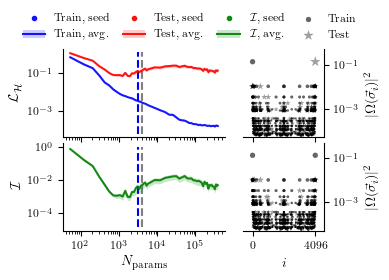

In [6]:
show_seeds = False

fig,ax = plt.subplots(2, 2, figsize=double_stack,gridspec_kw={'width_ratios': [2,1]})
ax0 = ax[0,0]
ax1 = ax[1,0]
ax2 = ax[0,1]
ax3 = ax[1,1]

fig.subplots_adjust(hspace=0.06)
fig.subplots_adjust(wspace=0.15)

seeds = np.arange(10,101,10)

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_random/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax0.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax0.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_random/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax0.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax0.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax0.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax0.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)

ax0.vlines(2**N,6*10**-5,1.4*10**0,linestyle='--',color='grey',zorder=-1)
ax0.vlines(2**N*frac_train,6*10**-5,1.4*10**0,linestyle='--',color='b',zorder=-1)

ax0.sharex(ax1)
ax0.tick_params(labelbottom=False)
ax0.set_yscale('log')
ax0.set_ylim(4*10**-5,1.9*10**0)
ax0.set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)


### Subplot 2

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_random/hellinger/bs_64/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax1.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N12/TestTrain/testSize{frac_test}_random/hellinger/bs_64/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax1.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax1.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax1.vlines(2**N,1.5*10**-5,10**0,linestyle='--',color='grey',zorder=-1)
ax1.vlines(2**N*frac_train,1.5*10**-5,10**0,linestyle='--',color='b',zorder=-1)

ax1.set_yscale('log')
ax1.set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax1.set_xscale('log')
ax1.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


# Hamiltonian & Exact Energy
h = -1.0
graph = nk.graph.Chain(length=N, pbc=True)
hi = nk.hilbert.Spin(s=0.5,N=N)
ha = sum([h*sigmax(hi,i) for i in range(N)])
ha += sum([-sigmaz(hi,i)*sigmaz(hi,(i+1)%N) for i in range(N)])
E_gs, gs = nk.exact.lanczos_ed(ha,compute_eigenvectors=True)

# bad seed 
seed = 10
split = 'random'
test_frac = 0.25
data_key = jax.random.PRNGKey(seed)
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)
ax2.scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
ax2.scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
ax2.set_ylabel(r"$\vert \Psi_\mathrm{exact}(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
ax2.set_ylabel(r"$\vert \Omega(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
ax2.set_yscale('log')
ax2.set_xticks([0,4096])
ax2.set_xticklabels([])
ax2.set_xlim(-600,4696)
ax2.set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)
ax2.set_ylim(5*10**-5,5*10**-1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
h, l = ax2.get_legend_handles_labels()

# good seed
seed = 20
split = 'random'
test_frac = 0.25
data_key = jax.random.PRNGKey(seed)
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)
ax3.scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
ax3.scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
ax3.set_xticks([0,4096])
ax3.set_xticklabels([r'$0$',r'$4096$'])
ax3.set_ylabel(r"$\vert \Psi_\mathrm{exact}(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
ax3.set_ylabel(r"$\vert \Omega(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
ax3.set_yscale('log')
ax3.set_xlim(-600,4696)
ax3.set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)
ax3.set_ylim(5*10**-5,5*10**-1)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_xlabel(r"$i$",fontsize=bigger_font_size)

ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]
train = plt.scatter([0], [0], marker='.',linestyle='None',linewidth=0.2,s=100*np.cbrt(np.max(y_train)), color='k',alpha=0.6,label=r'$\mathrm{Train}$')
test = plt.scatter([0], [0], marker='*',linestyle='None',linewidth=0.2,s=100*np.cbrt(np.max(y_train)), color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$')

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line),
    train,test]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label(),
          train.get_label(),test.get_label()]
fig.legend(handles=handles, labels=labels,loc='lower center',ncol=4,columnspacing=1.2,frameon=False,bbox_to_anchor=(0.5,0.875))


plt.savefig(f'./figures/Figure3_mpl.pdf',bbox_inches='tight')
plt.show()